In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import cv2

In [ ]:
img = cv2.imread('/content/drive/MyDrive/dataset/images/beagle.jpg')

In [ ]:
img.shape

(1830, 2728, 3)

You might be wondering what makes up an image. An image consists of three components: (HEIGHT, WIDTH, COLOR CHANNELS). Grayscale has one channel while RGB has three channels.

In [ ]:
type(img)

numpy.ndarray

Do also note that in order for you to process these images, they need to have numpy.ndarry data type. Here's how an image looks like:

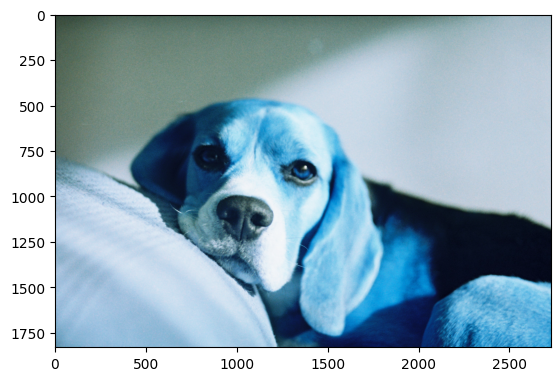

In [ ]:
plt.imshow(img)

Let's fix some issues here first. This is not the true color of the image. You might have noticed that upon reading the image, we used OpenCV as cv2. CV2 reads an RGB image as BGR thus, the messy picture. To correct this, we will use openCV as well.

In [ ]:
corrected_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [ ]:
plt.imshow(corrected_img)

Isn't it cute!

Now, let's further investigate color channels. I previously mentioned that grayscale only has 1 channel. Let's put that to the test:

In [ ]:
grayscale_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
grayscale_img.shape

(1830, 2728)

As we can see, our image only has 2 dimensions, the width and the height but the third component is missing. This is just python saying that we do not need to include 1 because it's straightforward that we only maintain one copy of the image.  

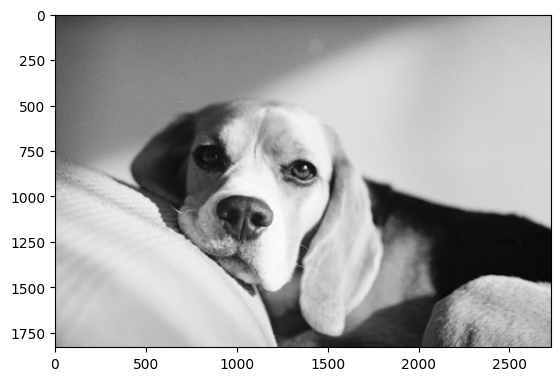

In [ ]:
plt.imshow(grayscale_img, cmap="gray")

Copy? We'll get there soon. Don't worry.

Now, let's investigate multi-color channels like RGB. Let's use the previous corrected image. To check the different channels, do this:

In [ ]:
corrected_img[:,:,0]

array([[ 59,  63,  58, ..., 188, 192, 196],
       [ 52,  53,  49, ..., 191, 191, 191],
       [ 55,  52,  47, ..., 192, 193, 186],
       ...,
       [173, 174, 173, ..., 213, 214, 214],
       [170, 175, 174, ..., 215, 214, 214],
       [167, 173, 173, ..., 213, 215, 216]], dtype=uint8)

This just means to get the array for the 0th index which is for Red Channel, 1 is for Green and 2 is for Blue. By this, we can now infer that an image maintains multiple COPIES of itself depending on how many channels it has. E.g., 1 channel = 1 copy & 3 channels = 3 copies.

Each value here represents an intensity value ranging from 0-255. Let's say for the red channel, a value of 255 means high presence of red while a value of zero mean no red.

Now, let's visualize each copy of the image:

In [ ]:
plt.imshow(corrected_img[:,:,0], cmap="gray")

We use the ***cmap='gray'*** to better see where the intensity values are high and low for this color channel.

In [ ]:
plt.imshow(corrected_img[:,:,1], cmap="gray")

In [ ]:
plt.imshow(corrected_img[:,:,2], cmap="gray")

Looking at the three images, they may look the same but upon closer inspection, we can see that they vary with the intensities of color.

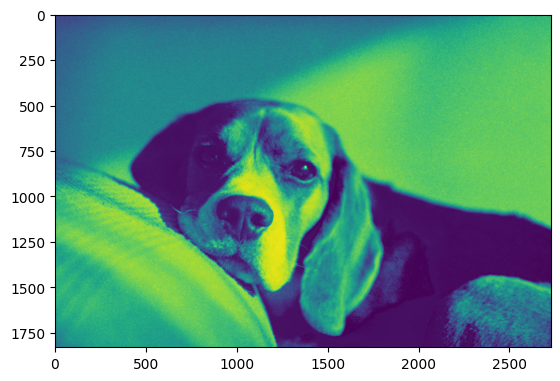

In [ ]:
plt.imshow(corrected_img[:,:,2])

If we remove the cmap, we can see that it has messy colors. This is because we did not entirely remove the colors from other channels by just indexing the copy of the image. In order to isolate the color we want, we can do this by:

In [ ]:
pic_red = corrected_img.copy()
pic_red[:,:,1] = 0
pic_red[:,:,2] = 0

What we did here is to remove the presence of other colors so that the color red remains!

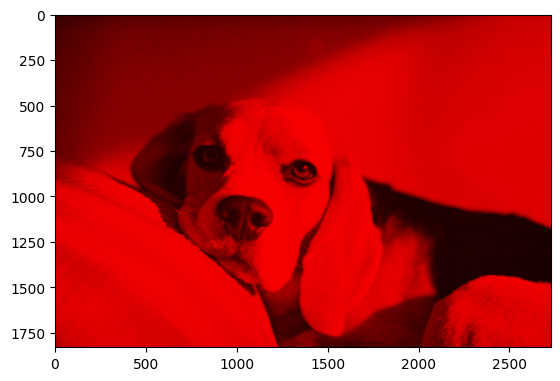

In [ ]:
plt.imshow(pic_red)

Voila! Here's the end result.

Now's let's procede on how we manipulate these images. We can easily do it if we think of images as arrays!

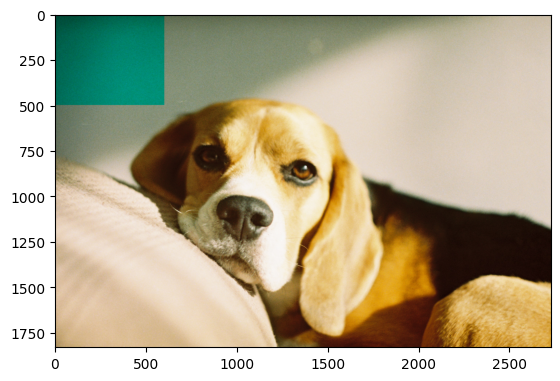

In [ ]:
custom_img = corrected_img.copy()
custom_img[0:500, 0:600, 0] = 0
plt.imshow(custom_img)

We can see that upon doing the slicing, the upper left portion of the image became in the shade of turquoise. This is because it lost the presence of red (since we altered the red channel) thus its color.

Next, let's explore ways to alter images:

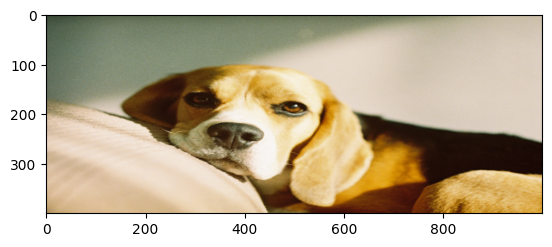

In [ ]:
resized_corrected_img = cv2.resize(corrected_img, (1000, 400))
plt.imshow(resized_corrected_img)

The resize method forces the image to change dimensions thus the shrinked appearance. You can also notice that the image was not cropped but was fitted to the given dimension. This operation alters the arrays for all channels at once in the process called interpolation.

In [ ]:
w_ratio = 0.5
h_ratio = 0.5

resized_corrected_img2 = cv2.resize(corrected_img, (0,0), corrected_img, w_ratio, h_ratio)

plt.imshow(resized_corrected_img2)

Here's another way to resize by using fixed ratios for height and width. Ratio is just a value that is multiplied to the dimension. E.g., Height = 1830; Resized height = Height * Ratio = 1830 * 0.5 = 915.  

In [ ]:
flipped_corrected_img = cv2.flip(corrected_img, -1) #0, 1 or -1
plt.imshow(flipped_corrected_img)

Flip changes the orientation of the image. You can change the value of 1 to either 0 or -1 to see the result. A value of 1 just means "flip horizontally". This operation swaps the pixel of one side to the other side of the image.

In [ ]:
flipped_corrected_img = cv2.cvtColor(flipped_corrected_img, cv2.COLOR_RGB2BGR)
cv2.imwrite('/content/drive/MyDrive/dataset/images/beagle_updated.jpg', flipped_corrected_img)

True

Finally, if you wanna save your image, you can do that by using cv2's imwrite method. An output of "True" just means that the image is saved in your chosen path.

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.imshow(flipped_corrected_img)

As an extra, if you want to make the images more bigger in your notebook, you can do that by create a figure, insert your image to it, and display it.

================================================================================

# **LAB ACTIVITY**

Now for your lab activity, let's test your knowledge using the simple operations demonstrated above. Create a function that accepts an image and outputs an image. Regarding the contents of the function, follow these intructions:

1. Pick an image from the internet, or any image locally, you are interested in. NOTE: The image must contain an mostly of the organism's face that has a set of eyes, a mouth, and set of ears.
2. Resize the image with a ratio of 150% on both dimensions.
3. Flip the image horizonatally, followed by another flip but this time, vertically.
4. Remove the presense of red on the region of the left eye.
5. Remove the presense of blue on the region of the right eye.
6. Retain green on region of the mouth
7. Remove the presense of all colors on the regions of both ears.
6. Save the processed image.

The template is to use the one below:

In [ ]:
def process_img(img):
  processed_img = img.copy()
  # DO the code here

  print('Processing Done!')
  return processed_img

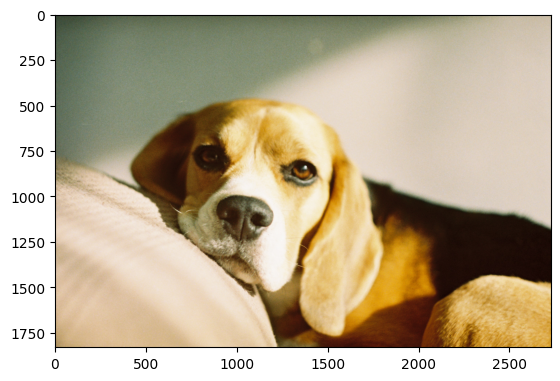

In [ ]:
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img2)

Your original image for reference.

In [ ]:
plt.imshow(process_img(img))

The processed image.

# **LECTURE ACTIVITY**

1. What happens when you select a region in an image and set a value of zero for all channels on that region?
2. Make a research about interpolation and explain how interpolation works when resizing an image.
3. How does the flip horizontal method work? Create a simple algorithm and test it using this simple 2D array:

0   1   1   2   1

1   0   0   2   1

1   1   1   1   0

0   0   0   2   1

0   0   2   2   1